In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Computational Mathematics  <a class="tocSkip">

## ODE solvers (or time-stepping methods - numerical solution of IVPs) <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Initial-Value-Problems-(IVPs)" data-toc-modified-id="Initial-Value-Problems-(IVPs)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Value Problems (IVPs)</a></span><ul class="toc-item"><li><span><a href="#Assumptions-on-the-RHS-function-$\boldsymbol{f}$" data-toc-modified-id="Assumptions-on-the-RHS-function-$\boldsymbol{f}$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assumptions on the RHS function $\boldsymbol{f}$</a></span></li><li><span><a href="#Requirements-for-a-numerical-scheme" data-toc-modified-id="Requirements-for-a-numerical-scheme-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Requirements for a numerical scheme</a></span><ul class="toc-item"><li><span><a href="#Notation" data-toc-modified-id="Notation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Notation</a></span></li><li><span><a href="#Convergence" data-toc-modified-id="Convergence-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Convergence</a></span></li></ul></li></ul></li><li><span><a href="#Model-Problem-1:-exponential-decay-(or-relaxation)" data-toc-modified-id="Model-Problem-1:-exponential-decay-(or-relaxation)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Problem 1: exponential decay (or relaxation)</a></span><ul class="toc-item"><li><span><a href="#Numerical-approximation" data-toc-modified-id="Numerical-approximation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerical approximation</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comments</a></span><ul class="toc-item"><li><span><a href="#Aside:-finite-differences" data-toc-modified-id="Aside:-finite-differences-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Aside: finite differences</a></span></li></ul></li><li><span><a href="#Observations" data-toc-modified-id="Observations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Class-exercise" data-toc-modified-id="Class-exercise-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Class exercise</a></span></li></ul></li><li><span><a href="#Link-to-numerical-differentiation" data-toc-modified-id="Link-to-numerical-differentiation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Link to numerical differentiation</a></span><ul class="toc-item"><li><span><a href="#Four-simple-schemes" data-toc-modified-id="Four-simple-schemes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Four simple schemes</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comments</a></span></li><li><span><a href="#An-example-application" data-toc-modified-id="An-example-application-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>An example application</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Comments</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#Errors-and-stability" data-toc-modified-id="Errors-and-stability-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Errors and stability</a></span><ul class="toc-item"><li><span><a href="#Definitions-(errors)" data-toc-modified-id="Definitions-(errors)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Definitions (errors)</a></span><ul class="toc-item"><li><span><a href="#Local-truncation-error" data-toc-modified-id="Local-truncation-error-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Local truncation error</a></span></li><li><span><a href="#Aside:-local-truncation-error-vs-residual" data-toc-modified-id="Aside:-local-truncation-error-vs-residual-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Aside: local truncation error vs residual</a></span></li><li><span><a href="#Order-of-convergence-&amp;-consistency" data-toc-modified-id="Order-of-convergence-&amp;-consistency-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Order of convergence &amp; consistency</a></span></li><li><span><a href="#Local-error" data-toc-modified-id="Local-error-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Local error</a></span></li><li><span><a href="#Global-error" data-toc-modified-id="Global-error-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Global error</a></span></li><li><span><a href="#Stability" data-toc-modified-id="Stability-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Stability</a></span></li></ul></li><li><span><a href="#Error-analysis-for-forward-Euler" data-toc-modified-id="Error-analysis-for-forward-Euler-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Error analysis for forward Euler</a></span></li></ul></li><li><span><a href="#Continuous-problem-analysis" data-toc-modified-id="Continuous-problem-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Continuous problem analysis</a></span><ul class="toc-item"><li><span><a href="#The-scalar-case" data-toc-modified-id="The-scalar-case-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The scalar case</a></span></li></ul></li><li><span><a href="#Stability-of-the-continuous-problem" data-toc-modified-id="Stability-of-the-continuous-problem-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stability of the <em>continuous problem</em></a></span></li><li><span><a href="#Numerical-stability-(of-the-discretised-equation)" data-toc-modified-id="Numerical-stability-(of-the-discretised-equation)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Numerical stability (of the discretised equation)</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Numerical-stability-for-our-model-problems" data-toc-modified-id="Numerical-stability-for-our-model-problems-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Numerical stability for our model problems</a></span><ul class="toc-item"><li><span><a href="#Model-Problem-1---exponential-decay-(or-relaxation)" data-toc-modified-id="Model-Problem-1---exponential-decay-(or-relaxation)-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Model Problem 1 - exponential decay (or relaxation)</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Further-observations" data-toc-modified-id="Further-observations-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Further observations</a></span></li></ul></li></ul></li><li><span><a href="#Runge-Kutta-(RK)-methods" data-toc-modified-id="Runge-Kutta-(RK)-methods-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Runge-Kutta (RK) methods</a></span><ul class="toc-item"><li><span><a href="#Two-stage-Runge-Kutta-example-(RK2)---aka-improved-Euler-/-explicit-trapezoidal-/-Euler-trapezoidal-/-Heun's-method" data-toc-modified-id="Two-stage-Runge-Kutta-example-(RK2)---aka-improved-Euler-/-explicit-trapezoidal-/-Euler-trapezoidal-/-Heun's-method-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Two stage Runge-Kutta example (RK2) - aka improved Euler / explicit trapezoidal / Euler-trapezoidal / Heun's method</a></span><ul class="toc-item"><li><span><a href="#RK2---schematic-visualisation-of-method" data-toc-modified-id="RK2---schematic-visualisation-of-method-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>RK2 - schematic visualisation of method</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Another-RK2-example-(RK2-version-2)---aka-explicit-midpoint-/-modified-Euler-..." data-toc-modified-id="Another-RK2-example-(RK2-version-2)---aka-explicit-midpoint-/-modified-Euler-...-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Another RK2 example (RK2 version 2) - aka explicit midpoint / modified Euler ...</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-10.2.1"><span class="toc-item-num">10.2.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Classical-RK4" data-toc-modified-id="Classical-RK4-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Classical RK4</a></span></li><li><span><a href="#An-RK4-schematic" data-toc-modified-id="An-RK4-schematic-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>An RK4 schematic</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-10.4.1"><span class="toc-item-num">10.4.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Learning objectives:  <a class="tocSkip">


* To consider ordinary differential equations (ODEs) and introduce a simple scalar and slightly more complex vector problem [the MSD problem we've seen previously].


* To consider some simple time-stepping solvers.


* To define and calculate errors.


* To consider numerical stability from theoretical and practical perspectives - stability being a vital concept to understand in many areas, including the numerical solution of partial differential equations. 


* To introduce several time stepping methods, including the family of Runge-Kutta methods.

# Introduction

We encounter problems involving time derivatives all the time, e.g. in ODEs and in time-dependent PDEs (e.g. including after we might have discretised PDEs in space to obtain a large system of coupled ODEs).

[NB. even if an ODE is not written explicitly in terms of a time variable, we could still interpret its single independent variable as time].

In these cases we need to solve, or "time-step", the problem to investigate how the system evolves with "time".

Below is an image obtained from solving a very famous set of ODEs which we will return to at the end of this lecture, the blue line maps out a trajectory in 3D space which evolves in time.

<img src="./figures/lorenz_attractor.png" width=600x>

# Initial Value Problems (IVPs)

Problems that evolve in time are often posed as IVPs, i.e. we can make predictions of a system’s behaviour if we know the conditions at some initial time (*without loss of generality ([w.l.o.g.](https://en.wikipedia.org/wiki/Without_loss_of_generality)*) we will always assume that this is at time $t=0$).

The general form of an ODE IVP is: 

$$\text{find} \;\;\;\; \boldsymbol{y}\equiv\boldsymbol{y}\,(t) \;\;\;\;\;\; \text{such that} \;\;\;\;\;\; 
\frac{d{\boldsymbol{y}}}{dt} = \boldsymbol{f}\,(t,\boldsymbol{y}\,(t)),\;\;\;\;\;\; \boldsymbol{y}(0)=\boldsymbol{y}_0,$$

where $\boldsymbol{f}\,$ is a given function of time as well as the unknown variable $\boldsymbol{y}\,$, which is itself a function of $t$ (we won't always bother explicitly writing this dependence). 

$\boldsymbol{y}_0$ is a prescribed *initial condition*.


<br>

Q. Why emphasise the point of "initial value problem"?
What are the alternatives?


<br>

Think of $\boldsymbol{y}\equiv\boldsymbol{y}(t)$ as mapping out a trajectory in a [*phase space*](https://en.wikipedia.org/wiki/Phase_space) which is the same dimension as our ODE system (cf. the Lorenz system above which has dimension 3 and we visualised the solution as a trajectory in 3D space). 

At any point in time the first-order ODE above is telling us the local direction of the trajectory and our job is to move forward in time, mapping out this trajectory. As we are going to be doing this with a discrete numerical method this is often termed *time-stepping*.

[Although note that our independent variable does not necessarily have to be time. In which case we might still be lose in our language and say "time"-stepping.]

Many (most) IVPs do not have closed-form solutions and thus have to be approximated numerically (same story as for PDEs of course).


## Assumptions on the RHS function $\boldsymbol{f}$ 

Note that it is common to assume that the RHS function  $\,\boldsymbol{f}\,$ is "*nice*".  

*Niceness* can be defined mathematically (we won't do this here) in a way that means that this IVP has a unique solution, and that we can take derivatives of $\,\boldsymbol{f}\,$ and these are similarly "nice". 

You can think of this requirement being imposed so that we can apply a [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) based analysis to both derive and analyse the expected behaviour of different ODE solvers.

Previously we've also used the vague term "smooth" - we often say that $\,\boldsymbol{f}\,$ is sufficiently [smooth](https://en.wikipedia.org/wiki/Smoothness). Again this just means that derivatives of the function are defined and are continuous, and allow us to make use of results such as Taylor series up to enough terms as required for our purposes..


<div class="optional">

Some definitions and classes of problem you might see mentioned in the literature:


1. If the RHS function is not explicitly dependent on the *independent* variable (here $t$), i.e. $\,f\equiv f(y)$, then the system is termed *autonomous*: <https://en.wikipedia.org/wiki/Autonomous_system_(mathematics)>


2. If the RHS function is linear in $y$ then the system is termed *linear*: <https://en.wikipedia.org/wiki/Linear_differential_equation>.  Note that even if $t$ appears in $f$ nonlinearly, it's the linearity of $y$ that's important [e.g. $y'=\sin(t)$ is easy to solve, but $y'=\sin(y)$ isn't (quite so easy!)]


3. An ODE is [*stiff*](https://uk.mathworks.com/company/newsletters/articles/stiff-differential-equations.html) if, for certain numerical solvers, we are forced for stability reasons to use smaller time step sizes than we would ideally like in order to keep the calculation stable.  For example, consider an ODE system that has components that evolve at different rates; we may well only care about an accurate simulation of the dominant component that evolves slowly and thus we may want to choose a relatively large time step size based on this slow variation. However, there may be a secondary (much smaller) component that evolves more quickly, it's smallness means we are not really interested in it, yet for the overall solver to be stable we need to select our time step based on the variability of this component. Systems that do not suffer for this phenomena are called *non-stiff*. Whether a problem is stiff or non-stiff has important implications for the stability and the selection of appropriate time step size as well as appropriate numerical methods to use: <https://en.wikipedia.org/wiki/Stiff_equation> - stiff problems are in general more difficult to deal with numerically.


4. Some ODE problems may have *conserved quantities*: <https://en.wikipedia.org/wiki/Conserved_quantity>. Sometimes it is important that our numerical solver respects this in the discrete solution so as to yield physically realistic solutions. 

</div>

## Requirements for a numerical scheme

### Notation
To form a discrete version of our problem, i.e. one that is solvable on a finite computer, we approximate the problem/solution at a series of time levels

$$t_0<t_1<t_2<\cdots$$

where $\,t_0\,$ is our initial time, i.e. we will generally assume for simplicity that $\;t_0 = 0$. 

We will use the notation $T$ if there is an upper limit on how far we will integrate in time - but note that this might be unbounded ($t \in [0,T]$ or $t \in [0,\infty)$).

It will often (but not always) be the case that our time step size is constant, i.e. $\;\;t_{n+1} - t_{n} = \Delta t$, $\;\;\forall\, n=1,2,\ldots$.

Otherwise we can specify a local time step size as $\;\;t_{n+1} - t_{n} = \Delta t_{n}$.

Our discrete numerical solution (approximation) at each of these time levels will be denoted by

$$\boldsymbol{y}_n \approx \boldsymbol{y}\,(t_{n}).$$

Note that we will use the notation $n$ to indicate a time level. 

<br><br>

For ACSE studuents, in later lectures where we are solving PDEs in time and space we will use *sub*scripts $i$, $j$ and $k$ (with the number of indices needed depending on the number of spatial dimensions) to represent spatial points, and will still use $n$ to indicate time level but will use a superscript following standard convention (i.e. $u_{ij}^n \approx u(x_i,y_j,t_{n})$). Here, as we have no spatial indices to worry about and get in the way, the norm is generally for $n$ to be written as a subscript.


### Convergence

We will generally require that our numerical solution satisfies two properties:


1. **Convergence** - this can be defined formally as 

$$\max_{0\,\le \,t_n\, \le\, T}\| \boldsymbol{y}_n - \boldsymbol{y}\,(t_{n})\| \longrightarrow 0 \;\;\;\; \text{as} \;\;\;\; \Delta t \longrightarrow 0. $$




2. **Correct qualitative behaviour** - even for finite (non infinitesimally small) $\Delta t$ we ideally would like numerical methods which yield approximations having the same qualitative behaviour as the exact solution. For example, they respect properties such as *conservation laws*, converge to a certain value or periodic orbit, or are bounded, e.g. they do not go negative when we know the quantity being integrated cannot physically be negative, such as would be the case for a concentration.

# Model Problem 1: exponential decay (or relaxation)

Exponential decay is a simple physical process governed by a relatively simple ODE. 

It also pops up all over the place:
<https://en.wikipedia.org/wiki/Exponential_decay#Applications_and_examples>.  

[This is a [link](<https://physicsworld.com/a/beer-paper-wins-ig-nobel-physics-prize/>) to an article about how the decay of beer froth following an exponential decay model won an [IgNobel Prize](https://www.improbable.com/ig/).  This is the paper <http://iopscience.iop.org/article/10.1088/0143-0807/23/1/304/meta>].


It is therefore an ideal initial test case for use to consider.

Better yet it has an [analytic solution](http://mathworld.wolfram.com/Analytic.html) and hence also provides an excellent case for us to test our numerical methods against.

Consider the following model problem which we will see *relaxes* a quantity $y$ to a value $y_r$:

$$\frac{dy}{dt} = K(y_r - y),$$

where $K$ is a coefficient that dictates how quickly the relaxation occurs, and $y_r$ is the value which we are relaxing to (can you see what the units of $K$ must be?).

This is a first-order ODE, and so integrating it up w.r.t. time once leads to a single arbitrary [constant of integration](https://en.wikipedia.org/wiki/Constant_of_integration). 

To arrive at a unique solution we thus need a single piece of auxiliary data - an initial condition which will generally take the form of specifying the value of the unknown at the initial time: $y(0)=y_0$.

This linear IVP has the exact (analytic) solution

$$ y(t) = y_r + (y(0) - y_r)\exp(-Kt).$$

It is evident, both from the ODE and the solution, that we have the qualitative behaviour:

$$ \lim_{t\rightarrow\infty} y(t) = y_r.$$

As an example, suppose $y_r$ is zero, then this problem can be used to describe radioactive decay where $K$ is the inverse half-life (should give you a further clue on what the units of $K$ are!).

Below is an example of decay to zero using the half life of carbon-14, as used in [radiocarbon dating](https://en.wikipedia.org/wiki/Radiocarbon_dating).

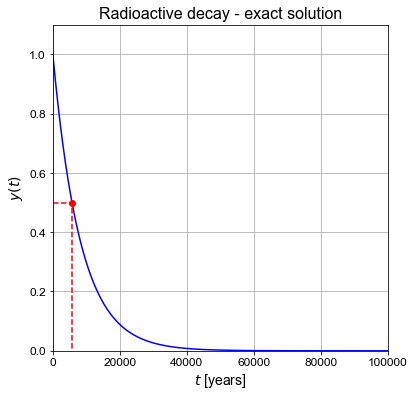

In [3]:
yr = 0.0
y0 = 1.0
C_14_half_life = 5730. #  our temporal units here are assumed to be years
# and the following is how you turn a "half life value" into a "decay constant"
K = np.log(2.)/C_14_half_life 

# let's plot things over 100,000 years
t = np.arange(0., 100000., 1.)

def y_ex(t):
    """ Function to evaluate the exact solution to the exponential decay problem.
    """ 
    return (yr + (y0-yr)*np.exp(-K*t))

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(t, y_ex(t), 'b')

# red dashed lines and dot emphasise the meaning of "half life"
ax1.plot([5730], [0.5], 'ro')
ax1.plot([0, 5730, 5730], [0.5, 0.5, 0], 'r--')

ax1.set_xlabel(r'$t$ [years]', fontsize = 14)
ax1.set_ylabel(r'$y(t)$', fontsize = 14)
ax1.set_title('Radioactive decay - exact solution', fontsize = 16)
ax1.grid(True)
ax1.set_xlim(0,100000)
ax1.set_ylim(0,1.1);

## Numerical approximation

A first-order ODE provides information about the local gradient of the solution.

If we decide to use information about the current time $t_{n}$ and state $y_{n} \approx y(t_{n})$ only, then the simplest possible discretisation of our ODE $\,(\dot{y}=f(y))\,$  is to use a so-called *forward difference* to approximate the gradient:

$$\frac{y_{n+1}-y_{n}}{\Delta t} = f(y_n),$$

where for model problem 1 above, $\;\;f(y) := K(y_r - y)$.

This corresponds to linear extrapolation and the scheme is usually referred to as a **forward Euler**, or **explicit Euler**, discretisation. The terms forward or explicit are appropriate descriptions as we are using on the RHS information we already know (what would a straightforward alternative be?)

Rearranging (e.g. for implementation in code as we will see below) we have the update formula:

$$y_{n+1} = y_{n} + \Delta t K(y_r - y_n).$$

Next we plot a schematic to see what the scheme is doing over one time step, 

then we will implement the scheme in full and compare to our exact solution.

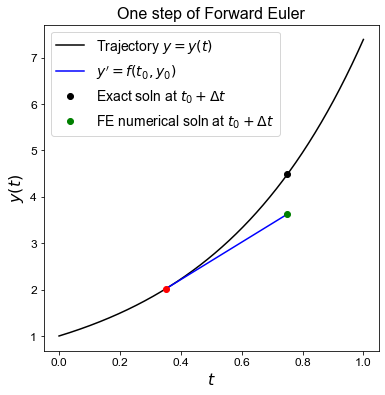

In [4]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_title('One step of Forward Euler', fontsize=16)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)

t = np.linspace(0, 1, 1000)

# an example solution trajectory (or solution to ODE $\dot{y}=f(y)$)
def y(t):
    return np.exp(2.*t)

# and this is the derivative of that y which has to equal the RHS of the ODE
def dy(t):
    return 2.*np.exp(2.*t)

ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4

ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * dy(t0)], 'b', label = r"$y'=f(t_0,y_0)$")
ax1.plot([t0], [y(t0)], 'ro')

ax1.plot([t0 + dt], [y(t0 + dt)], 'ko', label='Exact soln at $t_0 + \Delta t$')
ax1.plot([t0 + dt], [y(t0) + dt * dy(t0)], 'go', label='FE numerical soln at $t_0 + \Delta t$')
ax1.legend(loc='best', fontsize=14);

## Comments


- In the above image we assume we know the exact solution, i.e. we start from the red dot that lies on the exact solution (i.e. the curve the solution makes in $(t, y(t))$ space).


- At a later time the black dot shows where we should be; the green dot shows where the numerical method takes us; the difference is the error.


- Since we assumed we started at the exact solution, this error is called the *local* or the *one-step error*. Note that for every subsequent time step where we cannot assume we start from a point on the exact solution trajectory there is potential (indeed a likelihood) for these *local errors to accumulate and grow*. We will define these terms below, but perhaps unsurprisingly this is termed the *global error*.


- It should hopefully also be clear that the error in the image above can get worse in one of two ways: (1) it will be larger if we take a larger sized step; (2) it will also be larger if the black line diverges from the blue line more rapidly - in this case of the forward Euler method this rate of divergence depends on the second derivative of $y(t)$, or equivalently the first derivative of $f$ w.r.t. $t$.

### Aside: finite differences

We will explain finite difference formulae properly next lecture, but in the meantime just note that we can approximate 


$$\left.\frac{d{y}}{dt}\right|_{\,t=t_{n}} = \lim_{h\rightarrow 0} \frac{y(t_n+h)-y(t_n)}{h} \approx \frac{y(t_n+\Delta t)-y(t_n)}{\Delta t} = \frac{y_{n+1}-y_{n}}{\Delta t}, $$


with the  approximate expression on the RHS being an increasingly accurate estimate for the true derivative for a smaller choice of $\Delta t$.

Now let's actually apply a series of time steps and see how our numerical trajectory evolves in comparison to our numerical solution.

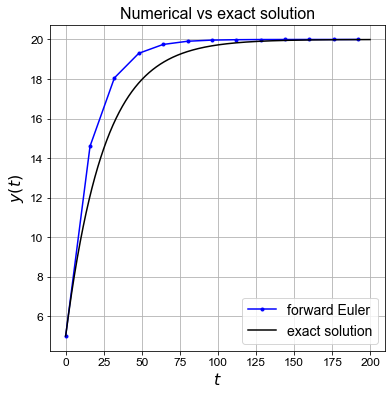

In [5]:
# set some physical parameters
K = 0.04
yr = 20
y0 = 5

# set some numerical (time-stepping) parameters
dt = 16
tend = 200

# define our time levels with a fixed dt
t = np.arange(0, tend, dt)
# initialise an array to store all solution values (for later plotting)
y = np.empty(len(t))
# and set the first entry in array to the initial condition
y[0] = y0

# now let's do the time-stepping via a 'for' loop (of course other approaches possible)
for n in range(len(t)-1):
    y[n+1] = y[n] + dt * K * (yr-y[n])

# this was an easy scheme so can implement in one line

# now plot the solution
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(t, y, 'b.-', label='forward Euler')

def y_ex(t):
    """ Function to evaluate the exact solution to the exponential decay problem.
    """ 
    return (yr + (y0-yr)*np.exp(-K*t))

# let's use a finer resolution to plot the exact solution to give a smoother line.
t_fine = np.arange(0, tend, dt/100)
ax1.plot(t_fine, y_ex(t_fine), 'k', label='exact solution')
ax1.set_xlabel(r'$t$', fontsize = 16)
ax1.set_ylabel(r'$y(t)$', fontsize = 16)
ax1.set_title('Numerical vs exact solution', fontsize = 16)
ax1.grid(True)
ax1.legend(loc='best', fontsize = 14);

## Observations

- So we indeed observe the (numerical and exact) solutions converging to the value $y_r$ (which here was set to 20).


- The numerical solution looks like it is converging to the exact value $y_r$, but seems to be doing so at too fast a rate when compared to the exact solution.


- So the long time behaviour of the numerical solution looks OK, but not the details of the initial transient. This may or may not be a concern, depending on our application.

## Class exercise

- Explore what happens qualitatively/visually if you make $\Delta t$ larger or smaller (e.g. try one order of magnitude larger and smaller than what we have above).

You should find that while for small $\Delta t$ the numerical solution is *accurate* (as well as being monotonic and stable), as you make $\Delta t$ larger it will first become *non-monotonic* (i.e. exhibit *wiggles*) but still approximate the correct solution at large times (i.e. is still *stable*), but for even larger $\Delta t$ it is both *non-monotonic* and *unstable* (the large time behaviour goes *bang*).

- What is the solution behaviour if you start from a $y(0)>y_r$?  

Before you run the numerical solver, think about the underlying ODE and its analytic solution. Can you see the expected behaviour without relying on the numerical solver or plotting the exact solution?

- Try rewriting this solver in terms of a function describing the RHS function and a generic time-stepper which calls this function, e.g. it could be something as simple as:

~~~~
...
f = lambda t, y: K*(yr-y)
...
for (n, t_n) in enumerate(t[:-1]):
    y[n+1] = y[n] + dt*f(t_n, y[n])
~~~~

# Link to numerical differentiation

The first approach is to consider the ODE at a single point in time (assuming for simplicity we have a scalar system so drop the bold vector notation):

$$\left.\frac{d{y}}{dt}\right|_{t=t_{n}} =\; {f}(t_{n},{y}(t_{n})).$$

[The vertical bar with $t=\ldots$ at the bottom just means "evaluated at" that $t$ value.]

<br>

Then we can use a *finite difference* formula to approximate the LHS, and substitute the numerical solution at level $n$ $(y_{n}\approx y(t_{n}))$ into the RHS (i.e. 
${f}(t_{n},{y}(t_{n}))\approx {f}(t_{n},{y}_{n})$).

[We will explain ***finite difference formulae*** properly next lecture, but in the meantime just note that we can approximate a derivative in the following ways:


\begin{align*}
\left.\frac{d{y}}{dt}\right|_{t=t_{n}} & = \lim_{h\rightarrow 0} \frac{y(t_n+h)-y(t_n)}{h} \\[5pt]
& \approx \frac{y(t_n+\Delta t)-y(t_n)}{\Delta t} = \frac{y(t_{n+1})-y(t_n)}{\Delta t} 
 \approx  \frac{y_{n+1}-y_n}{\Delta t} 
\\[10pt]
\text{or} \;\;\; & \approx \frac{y(t_n)-y(t_n-\Delta t)}{\Delta t} = \frac{y(t_n)-y(t_{n-1})}{\Delta t}  \approx \frac{y_n-y_{n-1}}{\Delta t} \\[10pt]
\text{or} \;\;\; & \approx \frac{y(t_n+\Delta t)-y(t_n-\Delta t)}{2\Delta t} = \frac{y(t_{n+1})-y(t_{n-1})}{2\Delta t} \approx \frac{y_{n+1}-y_{n-1}}{2\Delta t},
\end{align*}


with the three approximate expressions all being valid
discretisations of the derivative; with all of them being increasingly accurate for smaller choices of $\Delta t$.]

## Four simple schemes

For example:

- a *forward difference* leads to 

$$\frac{y_{n+1} - y_{n}}{\Delta t} = {f}(t_{n},{y}_{n}) \;\;\; \iff \;\;\; y_{n+1} = y_{n} + {\Delta t}\,{f}(t_{n},{y}_{n})$$

which we recognise as the **forward Euler** or **explicit Euler** method from the previous lectue.

- a *backward difference* leads to [this comes from the second approximate derivative above, but where we have updated the notation $n\rightarrow n+1$ to follow normal notation convention]

$$\frac{y_{n+1} - y_{n}}{\Delta t} = {f}(t_{n+1},{y}_{n+1}) \;\;\; \iff \;\;\; y_{n+1} - {\Delta t}\,{f}(t_{n+1},{y}_{n+1}) = y_{n}$$

which is called the **backward Euler** or **implicit Euler** method. Note that this results in an *implicit* equation for $y_{n+1}$, and 

- a *central difference* leads to [this is the third approximate derivative above]

$$\frac{y_{n+1} - y_{n-1}}{2\Delta t} = {f}(t_{n},{y}_{n}) \;\;\; \iff \;\;\;  y_{n+1} = y_{n-1} + 2\,{\Delta t}\,{f}(t_{n},{y}_{n})  $$

which is called the **leapfrog** method.

## Comments


- One observation here is that forward Euler and leapfrog are what are termed *explicit* schemes in that $y_{n+1}$ can be computed explicitly using information already available (e.g. from previous time levels), this leads to simple time stepping loops (and implementations in code). 


- Backward Euler on the other hand is what is termed an *implicit* scheme in that it leads to an equation for $y_{n+1}$ which can not be written in the form of $y_{n+1}=$ *some combination of known values*, as $y_{n+1}$ appears on both sides of the equation.


- For implicit relations, the approach needed to solve the problem depends on whether we are dealing with a scalar or vector system, and whether $f$ is linear or nonlinear in $y$. 


- A further observation is that for leapfrog we have a problem at the start where we only know $y_0$, but we need $y_1$ to use the formula to compute $y_2$ in the first leapfrog step.  This problem is described by the phrase that the scheme is ***not self-starting***. To address this we need to use a self-starting scheme to compute enough values from $y_0$ to get the non-self-starting method going. We could just use a simpler methods such as forward or backward Euler, and if concerned that the simplicity may introduce unacceptable errors, we could solve over the initial period with a smaller time step. We could also use an explicit scheme with the correct order of accuracy (we will see an example of this in the homework). In the example below we will just use an initial forward Euler step to estimate $y_1$.

A further obvious scheme (which can be obtained by adding together forward and backward Euler schemes, and hence cancelling some of their errors (cf. the lecture on quadrature where we combined estimated from two rules to obtain a third more accurate estimate) as we shall see below) is

\begin{align*}
\frac{y_{n+1} - y_{n}}{\Delta t} & = \frac{1}{2}\left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}_{n+1})\right) \\[5pt] 
\iff \;\;\;  
 y_{n+1} - \frac{\Delta t}{2}{f}(t_{n+1},{y}_{n+1}) & =  y_{n} + \frac{\Delta t}{2}{f}(t_{n},{y}_{n}),
 \end{align*}

which is called the **trapezoidal** scheme. 

Note that as the function $f$ evaluated at our newest time level appears in this relation, this scheme is also implicit.

## An example application

Let's now write some code to see how these four simple methods perform for our exponential decay model problem (where for simplicity we set the value we relax to, $y_r$, to zero). 

Note that in the case of a ***scalar linear*** problem, as is the current case we're considering, it's easy for us to deal with the issue of implicit schemes simply by rearranging our time-stepping update formula.

Note that this won't be the case for vector and/or nonlinear systems as we shall see later, and thus more work is required in these cases.

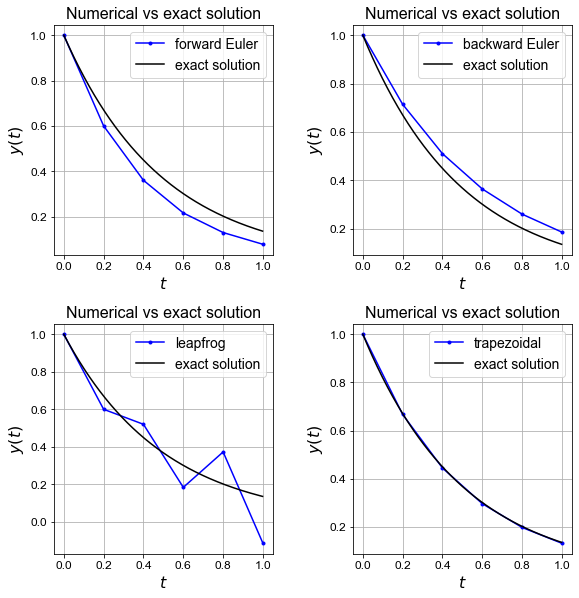

In [6]:
# This is our relaxation problem with y_r=0.

# define physical parameter
K = 2
# initial condition
y0 = 1
# and some numerical parameters
dt = 0.2
tend = 1.0

def f(t, y):
    return -K*y

def y_ex(t):
    """ Function to evaluate the exact solution to the exponential decay problem with y_r=0
    """ 
    return y0*np.exp(-K*t)

# let's use a finer resolution to plot the exact solution 
# to give a smooth curve in our plot
tfine = np.arange(0, tend, dt/100)

# set up figure with 4 subplots to plot our 4 methods
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=4)

# our time levels for the numerical solution
N_dt = int(round(tend/dt))
t = dt * np.linspace(0, N_dt, N_dt + 1)
# an alterntive would be two use
# t = np.arange(0, tend, dt)
# but round-off means that can miss the tend value
# alternatively we could use something like
# t = np.arange(0, tend+1.e-10, dt)
# but the 1.e-10 increment needs to be relative

# a time loop to implement forward Euler
y = np.empty(len(t))
y[0] = y0
for (n, t_n) in enumerate(t[:-1]):
    # note for this example this is the same as y[n]*(1-dt*K)
    y[n+1] = y[n] + dt * f(t_n, y[n])

axs[0].plot(t, y, 'b.-', label='forward Euler')
axs[0].plot(tfine, y_ex(tfine), 'k', label='exact solution')
axs[0].set_xlabel('$t$', fontsize=16)
axs[0].set_ylabel('$y(t)$', fontsize=16)
axs[0].set_title('Numerical vs exact solution', fontsize=16)
axs[0].grid(True)
axs[0].legend(loc='best', fontsize=14)

# backward Euler
y = np.empty(len(t))
y[0] = y0
for n in range(0, len(t) - 1):
    # note that for this simple problem we can rearrange the 
    # implicit expression and hence do not need to use the 
    # f function - if we did we would need to use an 
    # implicit equation solver such as was introduced in L4
    y[n+1] = y[n]/(1 + dt*K)

axs[1].plot(t, y, 'b.-', label='backward Euler')
axs[1].plot(tfine, y_ex(tfine), 'k', label='exact solution')
axs[1].set_xlabel('$t$', fontsize=16)
axs[1].set_ylabel('$y(t)$', fontsize=16)
axs[1].set_title('Numerical vs exact solution', fontsize=16)
axs[1].grid(True)
axs[1].legend(loc='best', fontsize=14)

# leapfrog
y = np.empty(len(t))
y[0] = y0
y[1] = y[0] + dt*f(t[0], y[0]) # leapfrog not self-starting so do a FE step here
for n in range(1, len(t) - 1):
    # as a two step scheme this uses the solution at level n as well as n-1
    y[n+1] = y[n-1] + 2.0 * dt * f(t_n, y[n])

axs[2].plot(t, y, 'b.-', label='leapfrog')
axs[2].plot(tfine, y_ex(tfine), 'k', label='exact solution')
axs[2].set_xlabel('$t$', fontsize=16)
axs[2].set_ylabel('$y(t)$', fontsize=16)
axs[2].set_title('Numerical vs exact solution', fontsize=16)
axs[2].grid(True)
axs[2].legend(loc='best', fontsize=14)

# trapezoidal
y = np.empty(len(t))
y[0] = y0
for n in range(0, len(t) - 1):
    # as for BE rearrange the implicit relation to obtain an update formula
    y[n+1] = y[n] * (1.0 - K*dt/2.0) / (1.0 + K*dt/2.0)

axs[3].plot(t, y, 'b.-', label='trapezoidal')
axs[3].plot(tfine, y_ex(tfine), 'k', label='exact solution')
axs[3].set_xlabel('$t$', fontsize=16)
axs[3].set_ylabel('$y(t)$', fontsize=16)
axs[3].set_title('Numerical vs exact solution', fontsize=16)
axs[3].grid(True)
axs[3].legend(loc='best', fontsize=14);

### Comments 

- Note that in the implementations above we stored the solution at all time levels - this is because this is cheap for us to do here, and we want the option of plotting the whole solution trajectory. In general, and for larger problems, this won't be feasible. In which case we might just return the final solution, or the solution at specified times (as the SciPy solvers typically do for example). If we don't store all time levels we need to think what information we do need to know for each update. Notice in the code above that the leapfrog scheme is the only one where we need to keep track of anything other than the *current* solution value to compute the next solution value - for leapfrog we also need to store the immediately previous solution. This is therefore a *two step (or level) scheme*, whereas the other three are all *single step*. We will return to this point shortly.


- For each of these cases think about where the gradient is being evaluated, and hence why (given knowledge of the qualitative behaviour of the exact solution trajectory for this test case) the above behaviour for each numerical scheme is exactly as we would expect.


- We're given the exact solution in the above code for plotting purposes, but we can of course also use knowledge of this to compute the exact errors in our numerical solution. Let's compute the errors for each scheme, and see how this changes as we change the time step size. (Q: what error norm are we computing and plotting in the code below?) 

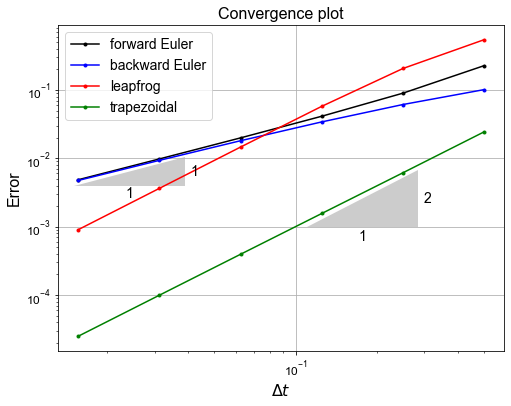

In [7]:
# define physical parameter
K = 2
# initial condition
y0 = 1
# and some numerical parameters
tend = 1.0

# the range of time step sizes we will consider
dts = [0.5/(2**n) for n in range(0, 6)]

def f(t, y):
    return -K*y

def y_ex(t):
    """ Function to evaluate the exact solution to the exponential decay problem with y_r=0
    """ 
    return y0*np.exp(-K*t)


# set up figure
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# somewhere to store our errors for each time step size
FE_error = np.empty(len(dts))
BE_error = np.empty(len(dts))
leapfrog_error = np.empty(len(dts))
trap_error = np.empty(len(dts))

# loop over our different time step sizes, compute solution and corresponding error
for (i, dt) in enumerate(dts):
    # our time levels for the numerical solution
    N_dt = int(round(tend/dt))
    t = dt * np.linspace(0, N_dt, N_dt + 1)

    # forward Euler
    y = np.empty(len(t))
    y[0] = y0
    for (n, t_n) in enumerate(t[:-1]):
        # note for this example this is the same as y[n]*(1-dt*K)
        y[n+1] = y[n] + dt * f(t_n, y[n])

    FE_error[i] = np.linalg.norm(y - y_ex(t))/np.sqrt(len(y))

    # backward Euler
    y = np.empty(len(t))
    y[0] = y0
    for n in range(0, len(t) - 1):
        # for this simple problem we can rearrange the implicit expression
        # and hence do not need to use the f function - if we did we would
        # need to use an implicit equation solver.
        y[n+1] = y[n]/(1 + dt*K)

    BE_error[i] = np.linalg.norm(y - y_ex(t))/np.sqrt(len(y))

    # leapfrog
    y = np.empty(len(t))
    y[0] = y0
    y[1] = y[0] + dt*f(t[0], y[0])
    for n in range(1, len(t) - 1):
        y[n+1] = y[n-1] + 2.0 * dt * f(t_n, y[n])

    leapfrog_error[i] = np.linalg.norm(y - y_ex(t))/np.sqrt(len(y))

    # trapezoidal
    y = np.empty(len(t))
    y[0] = y0
    # note here FOR THIS TEST CASE we can write an amplification factor
    # outside the loop to save some computations, and help explain the
    # stability discussion below. We could have done likewise of the other
    # schemes of course.
    amp = (1.0 - K*dt/2.0) / (1.0 + K*dt/2.0)
    for n in range(0, len(t) - 1):
        y[n+1] = y[n] * amp

    trap_error[i] = np.linalg.norm(y - y_ex(t))/np.sqrt(len(y))

axs.loglog(dts, FE_error, 'k.-', label='forward Euler')
axs.loglog(dts, BE_error, 'b.-', label='backward Euler')
axs.loglog(dts,leapfrog_error,'r.-',label='leapfrog')
axs.loglog(dts, trap_error, 'g.-', label='trapezoidal')
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('Error', fontsize=16)
axs.set_title('Convergence plot', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((1.5e-2, 4e-3), (1, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((1.1e-1, 1.0e-3), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

### Observations


- We see that *for this problem* that forward and backward Euler are both first-order accurate and that their errors, at least in the asymptotic limit, are pretty much identical.


- Leapfrog and trapezoidal are both second-order accurate. 


- The oscillations we see with leapfrog are still present with smaller time step sizes, but we see from this error plot that they decay at a rate consistent with the overall second-order accuracy of the scheme. However, their presence clearly leads to higher errors in comparison to the trapezoidal scheme. Below a certain time step size, even though oscillations are present, the errors in leapfrog are less than for the first-order methods, but it performs worse at larger time step sizes.


- Note that the leapfrog scheme is popular in numerical weather prediction where *filters* have been developed to deal with the oscillatory issue we see above. Part of this popularity is the fact that it is a second-order scheme, while only needing once function evaluation per time step which minimises cost. This could be a big advantage if $f$ is very expensive to compute.

# Errors and stability

## Definitions (errors)

### Local truncation error

The *local truncation error* (LTE; or often just *truncation error*) is defined, and computed, by *substituting the exact solution to the problem into the numerical scheme*.

[Note that this definition requires that the numerical scheme is scaled such that it approximates the derivatives in the differential equations, i.e. in the form 

$$\frac{y_{n+1}-y_{n}}{\Delta t} = \ldots \;\;\;\;  \text{not}  \;\;\;\; y_{n+1} = y_{n} + \Delta t \times \ldots.$$

Be warned though: some people don't make this a requirement and so the powers of $\Delta t$ flying around in their analysis will be one out compared to us!]

For forward Euler for example the LTE ($\tau$) therefore takes the form

$$\tau := \frac{y(t_{n+1})-y(t_{n})}{\Delta t}- \boldsymbol{f}\,(t,\boldsymbol{y}\,(t)).$$

By construction (up to round-off errors) the numerical solution satisfies this relation exactly (i.e. the terms of the RHS balance out), but this will not in general be true for the *exact solution* and so the above quantity will not be zero, and this discrepancy is termed the LTE.

As we will see below, we generally estimate the size and behaviour of the LTE by expanding the exact solution in the form of a Taylor series and substituting this into the discretised problem; we are then left with an estimate for the LTE in the form of a series. Since, in the limit of small $\Delta t$, the leading order term will dominate it is generally just this that we report as the LTE.


### Aside: local truncation error vs residual

So the LTE is defined as what we get from substituting the exact solution into the discretised equation. 

Note that we have also seen cases in previous lecture where we substitute a discrete/numerical approximate solution into the exact continuous equation - this is generally termed a [*residual*](https://en.wikipedia.org/wiki/Residual_(numerical_analysis)) rather than a truncation error.

<br>

So similar ideas, but different quantities.  The LTE is something we don't in general know but can estimate theoretically. The residual is something we can in principle compute given that we have access to the numerical solution.

### Order of convergence & consistency

A scheme is said to have an *order of accuracy* (or a *convergence order*) of $p$ if 

$$ |\tau|\le C \Delta t ^p \;\;\;\; \text{as} \;\;\;\; \Delta t \longrightarrow 0, $$

(and this bound in not valid for any higher value of $p$), for some constant $C$.

An equivalent way to write this is $ \tau = \mathcal{O}(\Delta t^p)$.

A method is called *consistent* if the LTE converges to zero as $\Delta t$ tends to zero. Note that this is equivalent to having a convergence order $p>0$.

Recall our discussion in a previous lecture on estimating convergence orders of algorithms via finding the slopes of lines on log-log plots - we will do this exact thing here where we plot $\tau$ against $\Delta t$.

### Local error

Assuming previous time levels are known exactly, the *local error* can be defined as the error committed by the numerical method in one time step. As we shall see below, it is equal to the LTE multiplied by the time step size. 

Or said another way the LTE is the local error per time step.


### Global error

The *global error* was given in the definition of convergence above:

$$E := \max_{t_0 \, \le \, t_n \, \le \, T}\| \boldsymbol{y}_{n} - \boldsymbol{y}\,(t_{n})\|.$$

[Recall that convergence was defined as $E \longrightarrow 0$ as $\Delta t \longrightarrow 0$.]


### Stability

Note that consistency alone does not imply convergence of the overall scheme as defined above. 

Instead

> Consistency $+$ Stability $\iff$ Convergence

*Stability* is a big, complex and vitally important area to understand - we will spend significant time explaining what it means shortly. 

## Error analysis for forward Euler

From our Taylor series analysis above we had

$$ y_{n+1} = y_n + \Delta ty'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4),$$

where here we are assuming that the $y$ variables are the exact solution (and its derivatives) evaluated at the time levels indicated by the subscripts.

Noting that $y'_n = f(t_n,y_n)$ this tells us that

$$ \tau = \frac{y_{n+1} -  y_n}{\Delta t} - f(t_n,y_n) = \frac{\Delta t}{2!}y''_n + \frac{\Delta t^2}{3!}y'''_n + \mathcal{O}(\Delta t^3),$$

and so the forward Euler method has a leading order term in its local truncation error of order $\mathcal{\Delta t}$ and so is consistent, with an order of accuracy ($p$) of one.

<br>

As defined above, the *local error* is the error committed in a single time step (assuming perfect knowledge up to this point). In the case of forward Euler it is the difference between what the scheme tells us:

$$ y_{n+1} = y_n + \Delta t\, f(t_n,y_n),$$

and what we know the true solution satisfies, which the Taylor series gives us an accurate description of:

$$ y_{n+1} = y_n + \Delta ty'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4),$$

this difference is clearly 

$$\text{Local error} = \frac{\Delta t^2}{2!}y''_n + \mathcal{O}(\Delta t^3),$$

which is consistent with what we said above:  the local error is the "LTE multiplied by the time step size" - $\text{Local error} = \Delta t \, \tau$.

<br>

Now note that $y''_n = df(t_n,y_n)/dt$ and so the leading order component of the local error is equivalent to

$$  \frac{1}{2}\, \Delta t^2\, \frac{df(t_n,y_n)}{dt}.$$

So we expect the error committed in one time step to be proportional to the time step size squared, and to the size of the derivative of the RHS function $f$.



# Continuous problem analysis

To motivate how we can analyse the numerical method, and understand what qualitative behaviour we are looking for in the numerical (discrete) solution, let's first analyse the continuous problem.


## The scalar case

In the case of the our first model problem of exponential decay, our problem was

$$\frac{dy}{dt} = K(y_r - y).$$

Now this equation is of the form

$$\frac{dy}{dt} = \lambda y + \text{Constant}.$$

It turns out we can essentially ignore the constant when it comes to analysing the behaviour of the continuous and the discrete systems  [recall the observation / comment on this fact we made just above where we suggested you check that the solution behaviour doesn't change if you change the constant from 10 to 100].

We thus need to consider the behaviour of the simplified generic system

$$\frac{dy}{dt} = \lambda y, $$

which we know has the exact solution

$$y(t) = y(0) \text{e}^{\lambda\,t}. $$


<br>


The important thing to note is that the long-term solution behaviour of this problem is governed by whether or not $\lambda$ is greater than or less than zero: 


- if $\lambda>0$ then $y \longrightarrow\infty$,


- if $\lambda<0$ then $y \longrightarrow 0$,


- if $\lambda=0$ then $y \equiv y(0)$,


as $t\longrightarrow\infty$.

You could of course write some code to check this for a few examples.

**Aside:** Now you might be thinking that while that may be interesting, this is a special (linear) case and so how useful can this be in general. Well it turns out that consideration of this simple case is extremely valuable and tells us a lot about more complex (e.g. nonlinear) problems as well. See Section 7.4.3 of LeVeque's book on finite difference methods.

However, it is very important that we extend the above analysis to systems (i.e. vector problems with more than one component):

# Stability of the *continuous problem*

The above diagonalisation of our coupled problem shows that we can actually consider the generic scalar problem


$$\frac{dz}{dt}=\lambda z, \;\;\;\; z(0)=1,$$


for each of the eigenvalues (which remember may be complex valued) of the matrix $A$ [and this is consistent with the scalar case of course].


It doesn't matter what initial condition we choose here, we've just chosen the value (1) that leads to the simple solution:

$$ z(t) = \exp(\lambda t).$$

The solution to this problem is termed **stable** if 

$$\lim_{t\rightarrow\infty}z(t)=0,$$

i.e. if $z=0$ is a fixed point. 

The alternative is termed **unstable** and here $z$ would diverge to infinity.

Here (in the continuous case) stability occurs for $Re(\lambda)<0$.

For a general mathematical discussion of stability/fixed point etc of differential equations see <https://en.wikipedia.org/wiki/Stability_theory>.

**Aside**

We can see this from [*Euler's formula*](https://en.wikipedia.org/wiki/Euler%27s_formula) which here tells us that

\begin{align*}
z(t)=\exp(\lambda t)&=\exp(\lambda_Rt)\exp(i\lambda_It)\\[5pt]
& = \exp(\lambda_Rt)\left(\cos(\lambda_It) + i\sin(\lambda_It)\right),
\end{align*}

where $\,i=\sqrt{-1}$, $\,\lambda_R=Re(\lambda)$, $\,\lambda_I=Im(\lambda)$.

The result now follows from the fact that $\sin$ and $\cos$ are bounded.

This is because the imaginary part of the above ($i\sin(\lambda_It)$) just oscillates with a magnitude less than one, so it does not impact on whether the long time behaviour of the system converges to zero of infinity, this is dictated by the $\exp(\lambda_Rt)$ factor.

Similarly the real part of the above includes the bounded oscillatory term ($\cos(\lambda_It)$) multiplied again by the 
$\exp(\lambda_Rt)$ factor which again controls whether the system converges to zero of infinity.

So it really is the behaviour of $\exp(\lambda_Rt)$ that dominates, and this behaviour is dictated by whether $\,\lambda_R=Re(\lambda)$ is positive or negative.

# Numerical stability (of the discretised equation)

To analyse the stability of our numerical method we perform a similar analysis. 

Or said another way, we ask the question: how does the act of discretising the problem change the solution behaviour we found above for this test problem? 

[We will see that the answer to this question is dependent on the underlying problem's physical parameters (which here in this abstract test problem are all encoded within the $\,\lambda\,$ parameter), but is also a function of numerical parameters such as the time step size $\Delta t$].

Let's consider the example of the forward Euler scheme, which for our scalar problem above, as well as the decoupled form of our vector problem (NB. we have the same matrix $A$ in the discretised system as the continuous problem and so can assume we have performed the same diagonalisation as we did above for the continuous problem) would take the form

$$\frac{{z}_{n+1}-{z}_{n}}{\Delta t} = \lambda z_{n}\;\;\;\iff\;\;\;
z_{n+1} = (1+\lambda\Delta t)z_{n}. $$

The solution of this sequence can be written in terms of the initial condition as

$$z_{n} = (1+\lambda\Delta t)^{n} z_0,$$

which clearly tends to zero provided 

$$\left|\;1+\lambda\Delta t\;\right|<1,$$ 

(this quantity can be termed the *amplification factor* for the scheme). 

Substituting $\lambda=\lambda_R + i\lambda_I$ (we need to consider the most general complex number case as we saw in the MSD problem that even if the underlying problem is completely real we need to consider the potential for eigenvalues with imaginary components once we've diagonalised), we have the stability condition

$$\sqrt{(1+\lambda_R\Delta t)^2 + (\lambda_I\Delta t)^2}<1.$$

[For the absolute value of a complex number see: <https://en.wikipedia.org/wiki/Absolute_value#Complex_numbers>].

For the case of forward Euler the stable region can therefore be visualised as a circle in the complex plane centred at $(-1,0)$ with radius 1, with the quantities $\lambda_R\Delta t$ and $\lambda_I\Delta t$ on the $x$ and $y$ axes.

Note that this is significantly more restrictive than the continuous case (which for stability simply required that $\,\lambda_R<0$), and for larger eigenvalues $\lambda$ requires a smaller time step size $\Delta t$ to ensure stability.

Let's plot both of these stability regions:

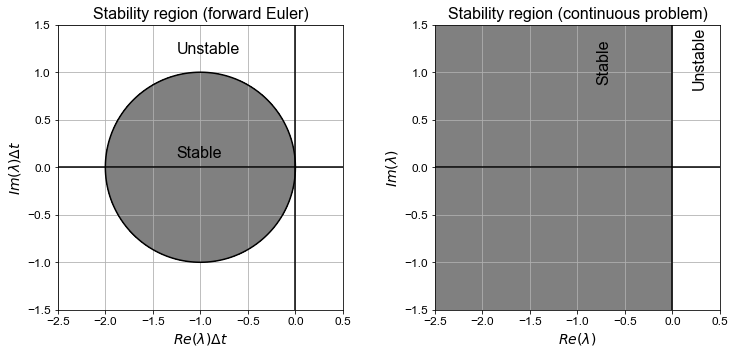

In [8]:
# let's try calculating and plotting the stability region for the discrete (FE) and continuous problems

# set up a mesh in x,y, sufficiently fine to get a nice image, with the bounds chosen appropriately
x = np.linspace(-2.5, 0.5, 100)
y = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x, y)

# define a complex parameter which is our  lambda * dt  quantity
lamdt = xx + 1j*yy

# compute the "amplification factor" for the forward Euler scheme
amp = 1 + lamdt

# and its magnitude - we want this to be less than one for stability
ampmag = np.abs(amp)

# set up our figs for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
fig.tight_layout(w_pad=5)  # add some padding otherwise axes labels overlap

# plot the forward Euler stability region
ax1.contour(x, y, ampmag, [1.0], colors=('k'))
ax1.contourf(x, y, ampmag, (0.0, 1.0), colors=('grey'))
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_xlabel(r'$Re(\lambda)\Delta t$', fontsize=14)
ax1.set_ylabel(r'$Im(\lambda)\Delta t$', fontsize=14)
ax1.set_title('Stability region (forward Euler)', fontsize=16)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(-1.25, 0.1, 'Stable', fontsize=16)
ax1.text(-1.25, 1.2, 'Unstable', fontsize=16)

# as we didn't do it previously let's also plot the stability region for the continuous problem
# note no dt in the axis labels as "timestep" is meaningless in the continuous world
ax2.axvspan(-3, 0, color='grey')
ax2.set_xlim(-2.5, 0.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax2.set_ylabel(r'$Im(\lambda)$', fontsize=14)
ax2.set_title('Stability region (continuous problem)', fontsize=16)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(-0.8, 0.9, 'Stable', fontsize=16, rotation=90)
ax2.text(0.2, 0.85, 'Unstable', fontsize=16, rotation=90);

We can similarly derive an amplification factor for our other three initial simple schemes, plots of which look like the following:

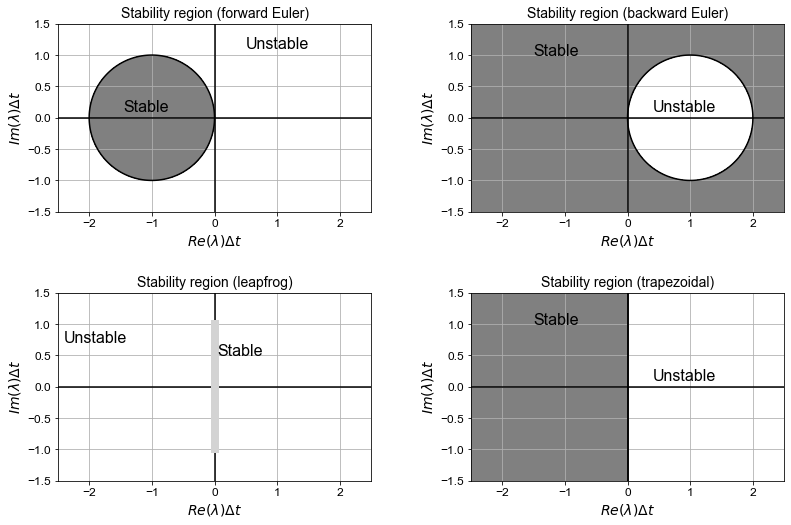

In [9]:
# let's calculate and plot the stability region for our discrete schemes
x = np.linspace(-2.5, 2.5, 250)
y = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x, y)
lamdt = xx + 1j*yy

# forward Euler amplification factor,  and its magnitude
FEamp = 1 + lamdt
FEampmag = np.abs(FEamp)

# backward Euler amplification factor,  and its magnitude
BEamp = 1.0/(1 - lamdt)
BEampmag = np.abs(BEamp)

# trapezoidal amplification factor,  and its magnitude
trapamp = (1.0 + lamdt/2.0) / (1.0 - lamdt/2.0)
trapampmag = np.abs(trapamp)

# set up our figs for plotting
fig, axs = plt.subplots(2, 2, figsize=(11, 7))
fig.tight_layout(w_pad=5, h_pad=5)
# reshape the list of axes as we are going to use in a loop
axs = axs.reshape(-1)

# plot the forward Euler stability region
axs[0].contour(x, y, FEampmag, [1.0], colors=('k'))
axs[0].contourf(x, y, FEampmag, (0.0, 1.0), colors=('grey'))
axs[0].set_aspect('equal')
axs[0].grid(True)
axs[0].set_xlabel('$Re(\lambda)\Delta t$', fontsize=14)
axs[0].set_ylabel('$Im(\lambda)\Delta t$', fontsize=14)
axs[0].set_title('Stability region (forward Euler)', fontsize=14)
axs[0].axhline(y=0, color='k')
axs[0].axvline(x=0, color='k')
axs[0].text(-1.45, 0.1, 'Stable', fontsize=16)
axs[0].text(0.5, 1.1, 'Unstable', fontsize=16)

# plot the backward Euler stability region
axs[1].contour(x, y, BEampmag, [1.0], colors=('k'))
axs[1].contourf(x, y, BEampmag, (0.0, 1.0), colors=('grey'))
axs[1].set_aspect('equal')
axs[1].grid(True)
axs[1].set_xlabel('$Re(\lambda)\Delta t$', fontsize=14)
axs[1].set_ylabel('$Im(\lambda)\Delta t$', fontsize=14)
axs[1].set_title('Stability region (backward Euler)', fontsize=14)
axs[1].axhline(y=0, color='k')
axs[1].axvline(x=0, color='k')
axs[1].text(-1.5, 1.0, 'Stable', fontsize=16)
axs[1].text(0.4, 0.1, 'Unstable', fontsize=16)

# plot the leapfrog stability region
axs[2].set_aspect('equal')
axs[2].grid(True)
axs[2].set_xlabel('$Re(\lambda)\Delta t$', fontsize=14)
axs[2].set_ylabel('$Im(\lambda)\Delta t$', fontsize=14)
axs[2].set_title('Stability region (leapfrog)', fontsize=14)
axs[2].axhline(y=0, color='k')
axs[2].axvline(x=0, color='k')
axs[2].axvline(x=0, ymin=1./6., ymax=5./6., color='lightgrey', lw=8)
axs[2].set_xlim((-2.5, 2.5))
axs[2].set_ylim((-1.5, 1.5))
axs[2].text(0.05, 0.5, 'Stable', fontsize=16); 
axs[2].text(-2.4, 0.7, 'Unstable', fontsize=16)

# plot the trapezoidal stability region
axs[3].contour(x, y, trapampmag, [1.0], colors=('k'))
axs[3].contourf(x, y, trapampmag, (0.0, 1.0), colors=('grey'))
axs[3].set_aspect('equal')
axs[3].grid(True)
axs[3].set_xlabel('$Re(\lambda)\Delta t$', fontsize=14)
axs[3].set_ylabel('$Im(\lambda)\Delta t$', fontsize=14)
axs[3].set_title('Stability region (trapezoidal)', fontsize=14)
axs[3].axhline(y=0, color='k')
axs[3].axvline(x=0, color='k')
axs[3].text(-1.5, 1.0, 'Stable', fontsize=16)
axs[3].text(0.4, 0.1, 'Unstable', fontsize=16);

## Observations


- Recall that the stability region for the *continuous problem* is given by $Re(\lambda)<0$, so ideally we would like the numerical scheme to be consistent with this, if it isn't we need to choose our time step size carefully to ensure stability (and for some schemes note that this may not be possible).


- Backward Euler's stability region *contains* that of the continuous problem and so the scheme is termed **unconditionally stable** - this analysis indicates that the scheme should be stable (for problems with  $Re(\lambda)<0$) no matter how large we choose $\Delta t$.


- This is also the case for the trapezoidal scheme.


- Note however that the backward Euler stability region is actually *larger* than for the continuous problem. E.g. this means that even for a positive (real component of) $\lambda$ (for which while of course the exact solution, being an exponential, goes off to infinity), our analysis indicates that if we choose a large enough $\Delta t$ backward Euler will be stable - but what does this mean in practice? - See the example directly below.


- Leapfrog (as a two step method) is a bit more complicated. As we saw above the method possesses a "spurious mode", this grows with time when excited and hence the method is unstable, except in situations where this "mode" is never initially excited. This is the case when the eigenvalues of the problem are purely imaginary, as indicated in the above stability region plot. Filters do exist to periodically kill off the spurious mode and make the method usable for more general applications. We won't go into any more detail on this, but if interested search for "Robert-Asselin time filter".


# Numerical stability for our model problems

Let's now actually think about what we can conclude about our model problems based on their eigenvalues and demonstrate that we can explain the observed behaviour of our solvers on these problems.

## Model Problem 1 - exponential decay (or relaxation)

For this scalar problem:

$$\frac{dy}{dt} = K(y_r - y),$$

calculating the eigenvalue is trivial: $\lambda = -K$ (i.e. purely real).

[Recall our comment above that we can essentially ignore the constant, $K\,y_r$, in our considerations].

So, for forward Euler, for stability we need that (the following being for the case of a purely real $K$)

\begin{align*}
\left|\;1+\lambda\Delta t\;\right| = \left|\;1-K\Delta t\;\right|<1 
& \iff -1<1-K\Delta t<1 \iff -2<-K\Delta t<0 \\[10pt]
& \iff 0<K\Delta t<2 \iff 0<\Delta t<\frac{2}{K},
\end{align*}

and for the choice we made above over physical parameter values (i.e. $K=0.04$) this means that we need $\Delta t<50$ for stability.

For this problem's given $\lambda$ values, first let's plot the choices $\Delta t = 64, 32, 16, 8$ on top of our stability region plot from earlier as red dots:

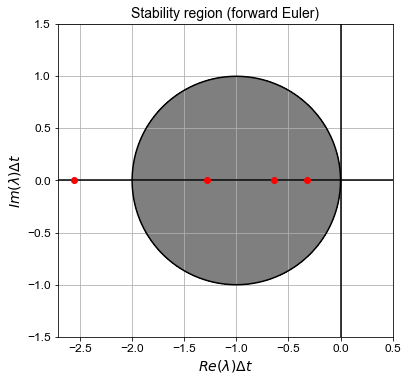

In [10]:
# we're again going to plot the stability region for forward Euler
x = np.linspace(-2.5, 0.5, 100)
y = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x, y)
lamdt = xx + 1j*yy
# forward Euler amplification factor
amp = 1 + lamdt
ampmag = np.abs(amp)
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
# forward Euler
ax1.contour(x, y, ampmag, [1.0], colors=('k'))
ax1.contourf(x, y, ampmag, (0.0, 1.0), colors=('tab:grey'))
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_xlabel('$Re(\lambda)\Delta t$', fontsize=14)
ax1.set_ylabel('$Im(\lambda)\Delta t$', fontsize=14)
ax1.set_title('Stability region (forward Euler)', fontsize=14)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

# add in the locations in the complex plane of the eigenvalues (multiplied by dt)
K = 0.04
for dt in (64, 32, 16, 8):
    ax1.plot(-K*dt, 0, 'ro')

### Observations

- So based upon our analysis we expect the largest of these time steps (the left-most red dot) to be unstable, and the others to be stable (as these three plot inside the stability region). 

Let's actually check if this is the case by running forward Euler with these time step values and checking the qualitative solution behaviour:

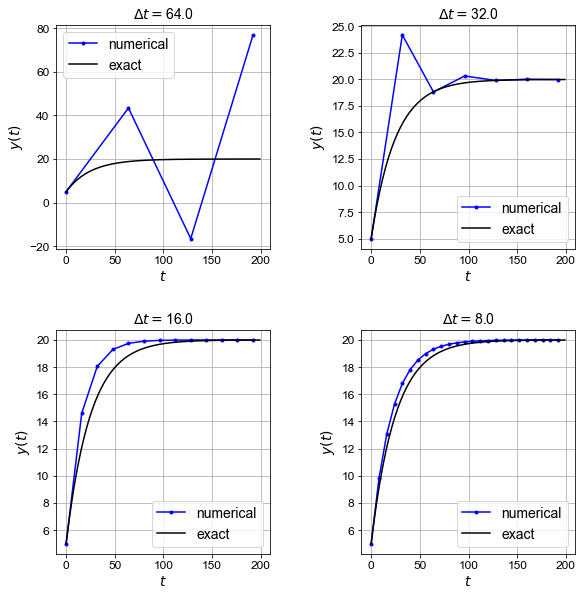

In [11]:
# physical parameters
K = 0.04
yr = 20
y0 = 5

# numerical parameters
tend = 200

def FE_exp_decay(dt):
    # a function for the time-stepper
    y[0] = y0
    for n in range(len(t) - 1):
        y[n+1] = y[n] + K*(yr - y[n])*dt
    return y

def y_ex(t):
    # a function for the exact solution
    return (yr + (y0 - yr)*np.exp(-K*t))

# temporal resolution to plot exact solution over
tfine = np.arange(0, tend, 1.0)

# set up the plots - we know we want 4 frames
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout(w_pad=5, h_pad=5)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)
# let's loop over the dt's we want to consider and plot results in a subplot
for i, dt in enumerate([64, 32, 16, 8]):
    t = np.arange(0, tend, dt)
    y = np.empty(len(t))
    y = FE_exp_decay(dt)
    ax[i].plot(t, y, 'b.-', label='numerical')
    # could store after computing once as doesn't change
    ax[i].plot(tfine, y_ex(tfine), 'k', label='exact')
    ax[i].set_xlabel('$t$', fontsize=14)
    ax[i].set_ylabel('$y(t)$', fontsize=14)
    ax[i].grid(True)
    ax[i].legend(loc='best', fontsize = 14)
    ax[i].set_title('$\Delta t=$%.1f' % dt, fontsize=14)

### Further observations


- So note that this is showing exactly what the underlying theory and corresponding analysis of the forward Euler scheme for this problem told us: a $\Delta t$ value larger than 50 is unstable (i.e. the solution is heading off to larger and larger values, and to infinity if we kept time-stepping), whereas values less than this are stable (although note in the case of $\Delta t = 32$, while it converges to the correct result eventually and so is indeed stable, its early time behaviour is non-monotonic and hence is qualitatively quite different to the behaviour of the exact solution which the two smaller time steps represent well).


- Note that sometimes we only care about long time behaviour, in which case $\Delta t = 32$ may be OK for our purposes. But in other situations the wiggles/oscillations (also termed under/over-shoots in other parts of this module) we observe here may be a problem.


- Note that the criteria for a stable $\Delta t$ value is completely dependent on the value of $K$ here of course, i.e. completely dependent on the underlying physics of the problem - basically inversely proportional to the time-scale of the physical process.


Let's now perform the same study for the more complex second test case.

# Runge-Kutta (RK) methods

Runge-Kutta (RK) methods are perhaps the most popular class of time-stepping schemes.  

Rather than using information from previous time levels to increase accuracy, they make use of *intermediate steps*, that is the RHS function is evaluated at locations in between $t_n$ and $t_{n+1}$. 

Hence they can be referred to as *intermediate step methods*.  

With RK methods these intermediate steps are often called *stages*.

[NB. An alternatice class of methods are termed multipstep methods as they use information from multiple preceeding time levels, not just the immedialtely previous combined with intermediate information - both have strengths and weaknesses - we focus on RK in the finite time we have as they are probably more useful/common].

## Two stage Runge-Kutta example (RK2) - aka improved Euler / explicit trapezoidal / Euler-trapezoidal / Heun's method

We saw above that the trapezoidal rule had good stability and accuracy properties, its drawback is that it's implicit and so in general requires the solution of a nonlinear and/or matrix system.

The scheme takes the form

$${y_{n+1} - y_{n}} = \frac{1}{2} {\Delta t} \left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}_{n+1})\right).$$

The problem is the ${y}_{n+1}$ on the RHS, but as we have already seen we can approximate this using forward Euler, and substitute this into the scheme, yielding the explicit 2 stage method:

\begin{align*}
    y^* &= y_{n} + \Delta t {f}(t_{n},{y}_{n}), \\[10pt]
    y_{n+1} &= y_{n} + \frac{1}{2} \Delta t \left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}^*)\right).
\end{align*}

The scheme is an explicit "2 stage" method which uses FE in the first stage (to give a "guess" ($y^*$) at the new solution), but then uses the result from this to evaluate a more accurate RHS to our ODE. 

<br>


This method is variously called the *explicit trapezoidal*/*Euler-trapezoidal* (as motivated by the above derivation), *Heun's*, or the *improved/modified Euler's* method.

It is an example of a *predictor-corrector* method, as commented on above.

However, it can also be considered as an example of a single step, multi-stage method, i.e. can also be interpreted as an explicit Runge-Kutta method.

[So note that there is some degree of overlap between time-stepping ODE solver families, with some simple schemes being interetable  in several different ways, and as examples of different families. This overlap lessens as we move to more complex, higher order schemes of course].

### RK2 - schematic visualisation of method

The figure below demonstrates what RK2 is doing for an ODE problem with RHS function  $\,f(t,{y}(t)) = y+t^3\,$ which has the  exact solution
$\,y(t) =  7\exp(t) - t^3 - 3t^2 - 6t - 6$.

NB. this problem is taken from the Wikipedia page on RK methods: <https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods>.

Exact solution:  3.027972799213316
RK2 approximation:  3.0


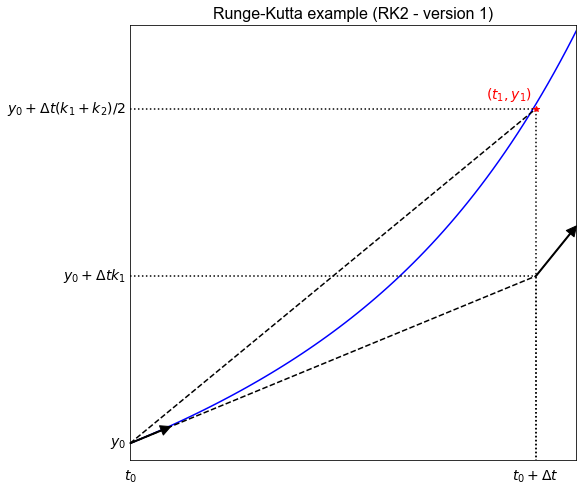

In [12]:
# example problem taken from Wikipedia entry on RK
def f(t, y):
    return y + t**3


def y(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6


fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.set_title('Runge-Kutta example (RK2 - version 1)', fontsize=16)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim([0,1.1])
ax1.set_ylim([0.9,3.5])
# define our x for plotting purposes
t = np.linspace(0, 1.5, 100)

# plot the exact solution
ax1.plot(t, y(t), 'b')

# initial time
t0 = 0.
# initial y
y0 = y(t0)
# example time step
dt = 1

# the stages k 
k1 = f(t0, y0)
k2 = f(t0 + dt, y0 + dt*k1)
y_new = y0 + dt*(1./2.)*(k1 + k2)

print('Exact solution: ', y(t0+dt))
print('RK2 approximation: ', y_new)

# length of the arrows indicating slopes
grad_length = 0.1
ax1.annotate("", xy=(t0+grad_length, y0+grad_length*k1), xytext=(t0, y0), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+dt], [y0, y0+dt*k1], 'k--')
ax1.annotate("", xy=(t0 + dt + grad_length, y0 + dt*k1 + grad_length*k2), xytext=(t0 + dt, y0 + dt*k1), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+dt], [y0, y0+dt*(1./2.)*(k1 + k2)], 'k--')

ax1.text(t0-0.01, y0, '$y_0$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0, 0.85, '$t_0$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.text(t0-0.01, y0+dt*k1, '$y_0+\Delta t k_1$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0+dt, 0.85, '$t_0+\Delta t$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.plot([t0, t0+dt], [y0+dt*k1, y0+dt*k1], 'k:')
ax1.plot([t0+dt, t0+dt], [-0.1, y0+dt*k1], 'k:')

ax1.text(t0-0.01, y0+dt*(1./2.)*(k1 + k2), '$y_0+\Delta t (k_1 + k_2)/2$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.plot([t0, t0+dt], [y0+dt*(1./2.)*(k1 + k2), y0+dt*(1./2.)*(k1 + k2)], 'k:')
ax1.plot([t0+dt, t0+dt], [-0.1, y0+dt*(1./2.)*(k1 + k2)], 'k:')
ax1.plot([t0+dt], [y0+dt*(1./2.)*(k1 + k2)], 'r*')
ax1.text(t0+dt-0.01, y0+dt*(1./2.)*(k1 + k2)+0.03, '$(t_1,y_1)$', color='r', horizontalalignment='right', verticalalignment='bottom', fontsize=14);

### Comments

What is happening here?  These are the key steps in the code above:
```Python
# the stages k 
k1 = f(t0, y0)
k2 = f(t0 + dt, y0 + dt*k1)
y_new = y0 + dt*(1./2.)*(k1 + k2)
```


Let's match this up with the figure above ...



- $k_1$ gives the initial slope (function evaluation) and can be represented by the slope of the first black arrow.


- We use this to evaluate a new location given by the end point of the lower dashed line, at which we calculate $k_2$ - an estimate for the slope at this location further along the time step interval.  In the case of this particular two stage scheme, this is actually located at the new time level, but we will see examples later where intermediate locations within the time step are also or instead used.


- Using these two estimates for the slope (the two short black solid arrows), we derive a new estimate for the slope (the upper dashed line in the plot above, and for this particular scheme the simple average of the two $k$ values) and use this to actually provide the solution at the new time level - the red star.


- Note that the red star is not on the blue exact solution curve - there is an error introduced here.

## Another RK2 example (RK2 version 2) - aka explicit midpoint / modified Euler ...

Note that the *explicit two stage RK method* introduced above is not the only example of such a scheme.

If instead of trapezoidal, we start from the *implicit midpoint rule*:

\begin{align*}
{y_{n+1} - y_{n}} &= {\Delta t}\, {f}\left(  \frac{1}{2} (t_{n}+t_{n+1}),\frac{1}{2} (y_{n}+y_{n+1})\right) \\[5pt] 
\iff \;\;
{y_{n+1} } &= y_{n} + {\Delta t}\, {f}\left(t_{n}+ \frac{\Delta t}{2} , \frac{1}{2} (y_{n}+y_{n+1}) \right),
\end{align*}

we can similarly formulate an explicit two stage method:

\begin{align*}
    y^* &= y_{n} + \frac{1}{2} \Delta t\, {f}(t_{n},{y}_{n}), \\[5pt] 
    {y_{n+1} } &= y_{n} + {\Delta t}\, {f}\left(t_{n}+ \frac{\Delta t}{2} , y^* \right).
\end{align*}

This scheme is termed *explicit midpoint* and sometimes modified Euler (although be warned there is some re-use of the terms modified/improved Euler between explicit midpoint and explicit trapezoidal in the literature).

Let's plot a schematic of what this scheme is doing.

Exact solution:  3.027972799213316
RK2 (ver 2) approximation:  2.625


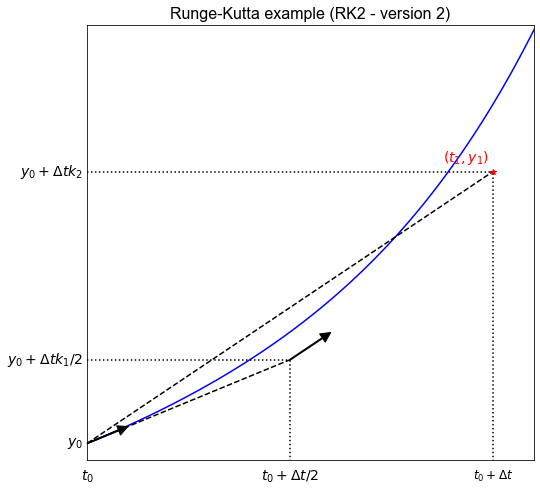

In [13]:
# example problem taken from Wikipedia entry on RK
def f(t, y):
    return y + t**3


def y(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6


fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.set_title('Runge-Kutta example (RK2 - version 2)', fontsize=16)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim([0,1.1])
ax1.set_ylim([0.9,3.5])
# define our t for plotting purposes
t = np.linspace(0, 1.5, 100)

# plot the exact solution
ax1.plot(t, y(t), 'b')

# initial time
t0 = 0.
# initial y
y0 = y(t0)
# example time step
dt = 1.

# the stages k 
k1 = f(t0, y0)
k2 = f(t0 + 0.5*dt, y0 + dt*0.5*k1)
y_new = y0 + dt*k2

print('Exact solution: ', y(t0+dt))
print('RK2 (ver 2) approximation: ', y_new)

# length of the arrows indicating slopes
grad_length = 0.1
ax1.annotate("", xy=(t0+grad_length, y0+grad_length*k1), xytext=(t0, y0), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+0.5*dt], [y0, y0+0.5*dt*k1], 'k--')
ax1.annotate("", xy=(t0 + 0.5*dt + grad_length, y0 + 0.5*dt*k1 + grad_length*k2), xytext=(t0 + 0.5*dt, y0 + 0.5*dt*k1), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+dt], [y0, y0+dt*k2], 'k--')

ax1.text(t0-0.01, y0, '$y_0$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0, 0.85, '$t_0$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.text(t0-0.01, y0+dt*0.5*k1, '$y_0+\Delta t k_1/2$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0+0.5*dt, 0.85, '$t_0+\Delta t/2$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.plot([t0, t0+0.5*dt], [y0+0.5*dt*k1, y0+0.5*dt*k1], 'k:')
ax1.plot([t0+0.5*dt, t0+0.5*dt], [-0.1, y0+0.5*dt*k1], 'k:')

ax1.text(t0-0.01, y0+dt*k2, '$y_0+\Delta t k_2$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.plot([t0, t0+dt], [y0+dt*k2, y0+dt*k2], 'k:')
ax1.plot([t0+dt, t0+dt], [-0.1, y0+dt*k2], 'k:')
ax1.text(t0+dt, 0.85, '$t_0+\Delta t$', horizontalalignment='center', verticalalignment='top')
ax1.plot([t0+dt], [y0+dt*k2], 'r*')
ax1.text(t0+dt-0.01, y0+dt*k2+0.03, '$(t_1,y_1)$', color='r', horizontalalignment='right', verticalalignment='bottom', fontsize=14);

### Comments

For this method the key code is:
```Python
# the stages k 
k1 = f(t0, y0)
k2 = f(t0 + 0.5*dt, y0 + dt*0.5*k1)
y_new = y0 + dt*k2
```

- For this case $k_1$ is used to provide $k_2$ located at the mid point of the interval. 


- It is this slope estimate that is used directly to provide the final update to the solution at the new time level (i.e. we make no use of $k_1$ for the final update in this scheme).


- We see from both the plots, as well as the print outs of the exact vs the numerical solution for the two examples, that the former scheme is clearly more accurate **for this problem**.


- You could implement the fully implicit trapezoidal and midpoint schemes to check that this difference in accuracy is also the case there. You could also derive the local truncation errors in the two cases to establish this more formally. 


## Classical RK4

Perhaps the most widely used multi-(i.e. $>2$)-stage RK method is the four stage explicit method often termed as the *classical RK(4) method* or just *RK4*.

It has the [*Butcher tableau*](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Explicit_Runge%E2%80%93Kutta_methods) [which we haven't explained so you can ignore this and focus on the code and images below]

$$\begin{array}
{c|cccc}
0\\
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & 0 &\frac{1}{2} \\
1 & 0 & 0 & 1\\
\hline
& \frac{1}{6} &\frac{1}{3} &\frac{1}{3} &\frac{1}{6} 
\end{array}$$


## An RK4 schematic

The figure below demonstrates what RK4 is doing for the problem where $f(t,{y}(t)) = y+t^3$ with exact solution
$y(t) =  7\exp(t) - t^3 - 3t^2 - 6t - 6$.



Exact solution, RK4 approximation:  3.027972799213316 3.0104166666666665


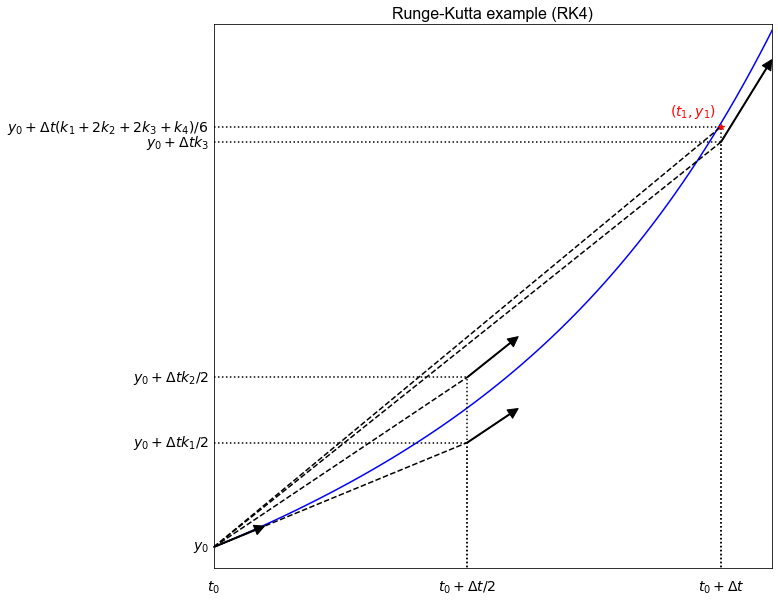

In [14]:
# example problem taken from Wikipedia entry on RK
def f(t, y):
    return y + t**3


def y(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6


fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)
ax1.set_title('Runge-Kutta example (RK4)', fontsize=16)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim([0,1.1])
ax1.set_ylim([0.9,3.5])
# define our x for plotting purposes
t = np.linspace(0, 1.5, 100)

# plot the exact solution
ax1.plot(t, y(t), 'b')

# initial time
t0 = 0.
# initial y
y0 = y(t0)
# example time step
dt = 1.
# the stages k multiplied by dt
k1 = dt*f(t0, y0)
k2 = dt*f(t0 + 0.5*dt, y0 + 0.5*k1)
k3 = dt*f(t0 + 0.5*dt, y0 + 0.5*k2)
k4 = dt*f(t0 + dt, y0 + k3)
y_new = y0 + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
print('Exact solution, RK4 approximation: ', y(t0+dt), y_new)

# length of the arrows indicating slopes
grad_length = 0.1
ax1.annotate("", xy=(t0+grad_length, y0+grad_length*(k1/dt)), xytext=(t0, y0), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+0.5*dt], [y0, y0+0.5*k1], 'k--')
ax1.annotate("", xy=(t0 + 0.5*dt + grad_length, y0 + 0.5*k1+grad_length*(k2/dt)), xytext=(t0 + 0.5*dt, y0 + 0.5*k1), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+0.5*dt], [y0, y0+0.5*k2], 'k--')
ax1.annotate("", xy=(t0 + 0.5*dt + grad_length, y0 + 0.5*k2+grad_length*(k3/dt)), xytext=(t0 + 0.5*dt, y0 + 0.5*k2), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+dt], [y0, y0+k3], 'k--')
ax1.annotate("", xy=(t0 + dt + grad_length, y0 + k3+grad_length*(k4/dt)), xytext=(t0 + dt, y0 + k3), arrowprops=dict(width=1, headlength=10, headwidth=10, facecolor='black'))
ax1.plot([t0, t0+dt], [y0, y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4)], 'k--')

ax1.text(t0-0.01, y0, '$y_0$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0, 0.85, '$t_0$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.text(t0-0.01, y0+0.5*k1, '$y_0+\Delta t k_1/2$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0+0.5*dt, 0.85, '$t_0+\Delta t/2$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.plot([t0, t0+0.5*dt], [y0+0.5*k1, y0+0.5*k1], 'k:')
ax1.plot([t0+0.5*dt, t0+0.5*dt], [-0.1, y0+0.5*k1], 'k:')
ax1.text(t0-0.01, y0+0.5*k2, '$y_0+\Delta t k_2/2$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.plot([t0, t0+0.5*dt], [y0+0.5*k2, y0+0.5*k2], 'k:')
ax1.plot([t0+0.5*dt, t0+0.5*dt], [-0.1, y0+0.5*k2], 'k:')
ax1.text(t0-0.01, y0+k3, '$y_0+\Delta t k_3$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.text(t0+dt, 0.85, '$t_0+\Delta t$', horizontalalignment='center', verticalalignment='top', fontsize=14)
ax1.plot([t0, t0+dt], [y0+k3, y0+k3], 'k:')
ax1.plot([t0+dt, t0+dt], [-0.1, y0+k3], 'k:')
ax1.text(t0-0.01, y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4), '$y_0+\Delta t (k_1 + 2k_2 + 2k_3 + k_4)/6$', horizontalalignment='right', verticalalignment='center', fontsize=14)
ax1.plot([t0, t0+dt], [y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4), y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4)], 'k:')
ax1.plot([t0+dt, t0+dt], [-0.1, y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4)], 'k:')
ax1.plot([t0+dt], [y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4)], 'r*')
ax1.text(t0+dt-0.01, y0+(1./6.)*(k1 + 2*k2 + 2*k3 + k4)+0.03, '$(t_1,y_1)$', color='r', horizontalalignment='right', verticalalignment='bottom', fontsize=14);

### Comments

As we hoped, we've clearly done more work here but have got a more accurate result.



# Summary

In this lecture we have introduced ODEs via two model problems, one scalar and one a small ODE *system* [only in the starred material]. 

We have derived some simple time-stepping schemes and considered stability (of the continuous and the discretised problems), in the context of eigenvalue analyses, and convergence.

As well as several simple time-steppers, we have introduced the family of Runke-Kutta ODE solvers.